___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv('Ready_to_ML.csv')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [246]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000
mean,23537.241,68863.812,1708.965,5.820,129.526,1425.205,1.460,5.166,118.414,5.532
std,20811.986,62794.146,772.440,1.417,54.255,307.387,0.853,4.655,65.642,2.220
min,490.000,0.000,0.000,1.000,0.000,347.000,1.000,0.000,33.000,0.000
25%,12490.000,19155.000,1248.000,5.000,105.000,1228.000,1.000,2.000,80.000,4.300
50%,18440.000,54000.000,1595.000,6.000,123.000,1375.000,1.000,4.000,100.000,5.200
75%,28330.000,100675.000,1969.000,6.000,150.000,1597.000,2.000,7.000,135.000,6.400
max,549000.000,667128.000,6300.000,8.000,399.000,3150.000,9.000,20.000,450.000,18.300


In [247]:
df.duplicated().sum()

1815

In [248]:
df.drop_duplicates(inplace=True)

In [249]:
df.duplicated().sum()

0

In [250]:
df.drop(columns=["make", "location"], inplace=True)

In [251]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane            825
SEAT Leon                 757
Dacia Sandero             721
Hyundai i30               699
Opel Astra                634
                         ... 
Mercedes-Benz S 65 AMG      1
Mercedes-Benz CLK 320       1
Toyota GR86                 1
Toyota Tacoma               1
Renault R 11                1
Name: count, Length: 490, dtype: int64

In [252]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [253]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [254]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

In [255]:
df.extras.value_counts()

extras
1     5693
2     2331
3     1946
4     1639
5     1307
6     1011
7      958
8      703
9      586
10     535
11     411
12     351
13     250
14     174
15     153
16      80
17      39
18      21
19       7
26       1
20       1
Name: count, dtype: int64

## multicollinearity control

In [256]:
df_num = df.select_dtypes(include ="number")

In [257]:
df_num.corr()

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000,-0.513,0.473,0.298,0.155,0.326,0.588,-0.256,-0.526,0.687,0.165
mileage,-0.513,1.000,0.097,-0.075,0.143,-0.176,0.012,0.360,0.743,-0.096,0.111
engine_size,0.473,0.097,1.000,0.105,0.623,0.150,0.570,0.062,0.180,0.805,0.627
gears,0.298,-0.075,0.105,1.000,0.106,0.189,0.375,-0.070,-0.127,0.275,0.083
co_emissions,0.155,0.143,0.623,0.106,1.000,0.067,0.306,0.117,0.331,0.515,0.805
extras,0.326,-0.176,0.150,0.189,0.067,1.000,0.323,-0.093,-0.181,0.283,0.087
empty_weight,0.588,0.012,0.570,0.375,0.306,0.323,1.000,-0.038,-0.037,0.677,0.266
previous_owner,-0.256,0.360,0.062,-0.070,0.117,-0.093,-0.038,1.000,0.447,-0.022,0.118
age,-0.526,0.743,0.180,-0.127,0.331,-0.181,-0.037,0.447,1.000,-0.033,0.337
power_kW,0.687,-0.096,0.805,0.275,0.515,0.283,0.677,-0.022,-0.033,1.000,0.554


<Axes: >

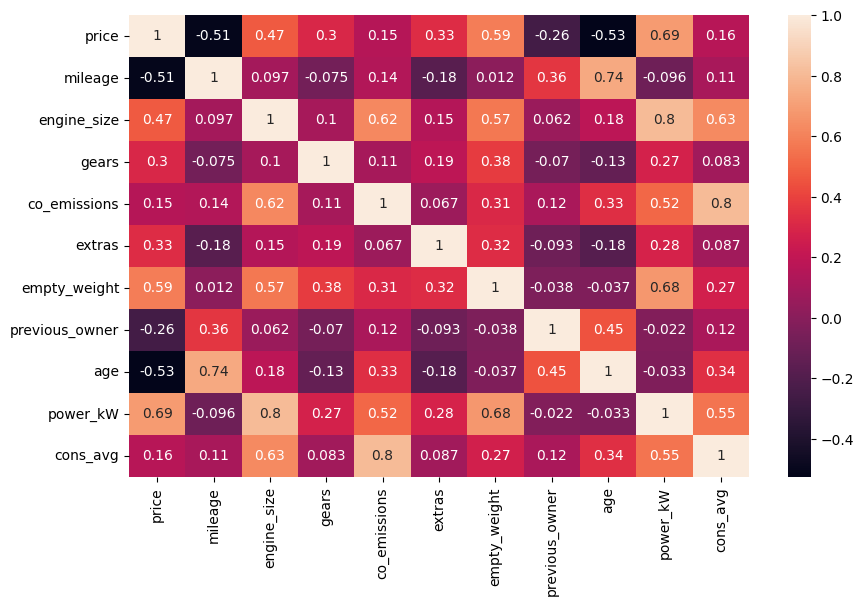

In [258]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot =True)

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [260]:
df_predictors = df_num.drop('price', axis=1)
predictors = df_predictors.columns

In [261]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [262]:
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [263]:
vif_data

# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,5.471
1,engine_size,25.196
2,gears,21.675
3,co_emissions,23.505
4,extras,2.781
5,empty_weight,38.758
6,previous_owner,4.799
7,age,6.880
8,power_kW,17.868
9,cons_avg,24.706


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [264]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OneHotEncoder

### Example

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [ ]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [ ]:
X_test

,col
7,good
8,bad
9,car


In [ ]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,col_bad,col_bed,col_good,col_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0


In [ ]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


,col_bad,col_bed,col_good,col_worst
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,good,6
6,good,7
7,bad,8
8,ugly,9
9,worst,10


In [179]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.2, shuffle=False)

NameError: name 'data' is not defined

In [ ]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,good


In [ ]:
X_test

,col
6,good
7,bad
8,ugly
9,worst


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [ ]:
enc_2.fit_transform(X_train)

,col
0,1.0
1,0.0
2,2.0
3,2.0
4,1.0
5,2.0


In [ ]:
enc_2.transform(X_test)

,col
6,2.0
7,1.0
8,-1.0
9,0.0


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [111]:
df.select_dtypes(include="object").columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object')

In [112]:
df.select_dtypes(include="object")

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Cloth,efficient,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Compact,Pre-registered,Yes,Automatic,Electric,Dealer,4WD,No,Part/Full Leather,efficient,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Compact,Used,Yes,Automatic,Benzine,Dealer,4WD,No,Part/Full Leather,unefficient,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Compact,Used,Yes,Automatic,Benzine,Dealer,4WD,No,Part/Full Leather,unefficient,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Compact,Used,Yes,Automatic,Diesel,Dealer,4WD,No,Part/Full Leather,unefficient,Standard,Standard,Safety Premium Plus Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26706,Volvo S90,Sedan,Used,Yes,Automatic,Diesel,Dealer,4WD,No,Part/Full Leather,efficient,Standard,Standard,Safety Premium Plus Package
26707,Volvo S40,Sedan,Used,No,Automatic,Benzine,Dealer,Front,Yes,Cloth,efficient,Standard,Standard,Safety Standard Package
26708,Volvo C30,Sedan,Used,Yes,Manual,Diesel,Dealer,Front,Yes,Cloth,unefficient,Standard,Standard,Safety Premium Package
26709,Volvo S90,Sedan,Used,Yes,Automatic,Benzine,Dealer,4WD,Yes,Part/Full Leather,efficient,Standard,Standard,Safety Premium Package


In [267]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
X_train.shape

(14557, 24)

In [271]:
X_test.shape

(3640, 24)

In [272]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [569]:
onehot_col  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

ordinal_col = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']

In [570]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[["Used", "Employee's car", "Demonstration", "Pre-registered"], ["No", "Yes"], ['Dealer', 'Private seller'] ,["No", "Yes"] ,['Cloth','Part/Full Leather'] ,['unefficient', 'efficient'] ,['Standard', 'Premium', 'Premium Plus'], ['Standard', 'Plus'], ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']])
onehot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)


In [571]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_col),
        ('onehot', onehot_encoder, onehot_col)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

In [276]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
16734,Volvo V40,Compact,Used,Yes,98027.000,Automatic,Diesel,Dealer,1560.000,6.000,...,No,Part/Full Leather,3.000,efficient,7.000,84.000,3.900,Standard,Standard,Safety Premium Package
14781,Ford Mondeo,Station wagon,Used,Yes,17195.000,Automatic,Diesel,Dealer,1995.000,8.000,...,Yes,Part/Full Leather,1.000,efficient,1.000,140.000,5.200,Premium,Plus,Safety Premium Package
2414,Renault Megane,Coupe,Used,No,225000.000,Manual,Benzine,Private seller,1998.000,6.000,...,No,Part/Full Leather,1.000,efficient,13.000,132.000,7.600,Standard,Standard,Safety Premium Package
1430,Opel Astra,Sedan,Used,No,62807.000,Automatic,Benzine,Dealer,1364.000,8.000,...,Yes,Cloth,4.000,efficient,8.000,103.000,6.700,Premium,Standard,Safety Premium Package
1512,Opel Adam,Sedan,Used,Yes,60750.000,Manual,Benzine,Dealer,1398.000,5.000,...,Yes,Cloth,1.000,unefficient,3.000,74.000,0.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Toyota RAV 4,Off-Road/Pick-up,Used,No,62786.000,Manual,Benzine,Dealer,1987.000,6.000,...,No,Part/Full Leather,2.000,unefficient,6.000,112.000,6.800,Premium,Standard,Safety Premium Package
11964,Toyota Aygo,Sedan,Used,No,19715.000,Manual,Benzine,Dealer,998.000,5.000,...,No,Cloth,1.000,efficient,3.000,53.000,4.100,Standard,Plus,Safety Standard Package
5390,Fiat Panda,Compact,Used,Yes,106700.000,Manual,Diesel,Dealer,1248.000,5.000,...,No,Cloth,1.000,efficient,5.000,70.000,4.400,Standard,Plus,Safety Premium Package
860,Opel Astra,Coupe,Used,No,205000.000,Manual,Benzine,Private seller,1364.000,5.000,...,Yes,Cloth,3.000,efficient,17.000,66.000,6.300,Standard,Standard,Safety Premium Package


In [277]:
X_test

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
15071,Ford Focus,Sedan,Used,Yes,27532.000,Manual,Diesel,Dealer,1500.000,6.000,...,No,Cloth,1.000,efficient,2.000,88.000,3.600,Premium,Plus,Safety Premium Package
10999,Toyota Aygo,Compact,Used,Yes,31167.000,Manual,Benzine,Dealer,998.000,5.000,...,No,Cloth,1.000,efficient,2.000,53.000,4.000,Standard,Plus,Safety Premium Package
14000,Ford Mustang,Convertible,Used,No,33800.000,Automatic,Benzine,Private seller,5083.000,6.000,...,Yes,Part/Full Leather,1.000,unefficient,4.000,310.000,12.500,Standard,Plus,Safety Premium Package
15766,Hyundai TUCSON,Off-Road/Pick-up,Used,Yes,34850.000,Automatic,Diesel,Dealer,1600.000,6.000,...,No,Cloth,1.000,unefficient,4.000,100.000,4.650,Standard,Standard,Safety Premium Package
4291,Peugeot 3008,Off-Road/Pick-up,Used,No,57430.000,Automatic,Diesel,Dealer,1997.000,8.000,...,Yes,Part/Full Leather,1.000,efficient,3.000,132.000,4.900,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,Peugeot 207,Convertible,Used,No,9063.000,Manual,Benzine,Dealer,1598.000,5.000,...,Yes,Cloth,1.000,unefficient,12.000,88.000,6.400,Standard,Standard,Safety Standard Package
14542,Ford Kuga,Off-Road/Pick-up,Used,No,111655.000,Manual,Benzine,Dealer,1498.000,6.000,...,No,Part/Full Leather,2.000,efficient,7.000,110.000,5.650,Premium,Standard,Safety Premium Package
3053,Renault Talisman,Station wagon,Used,No,23576.000,Automatic,Diesel,Dealer,1997.000,6.000,...,No,Cloth,1.000,unefficient,2.000,118.000,4.600,Standard,Standard,Safety Premium Package
7589,SEAT Arona,Off-Road/Pick-up,Used,No,34892.000,Automatic,Benzine,Dealer,999.000,7.000,...,Yes,Cloth,1.000,efficient,3.000,85.000,5.000,Premium,Plus,Safety Premium Package


In [278]:
preprocessor.fit_transform(X_train)

,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,make_model_Dacia Logan,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,...,98027.000,1560.000,6.000,89.000,1,1472.000,3.000,7.000,84.000,3.900
14781,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,...,17195.000,1995.000,8.000,136.000,7,1826.000,1.000,1.000,140.000,5.200
2414,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,...,225000.000,1998.000,6.000,178.000,6,1395.000,1.000,13.000,132.000,7.600
1430,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,...,62807.000,1364.000,8.000,157.000,4,1280.000,4.000,8.000,103.000,6.700
1512,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,...,60750.000,1398.000,5.000,0.000,9,1120.000,1.000,3.000,74.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,...,62786.000,1987.000,6.000,158.000,3,1700.000,2.000,6.000,112.000,6.800
11964,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,19715.000,998.000,5.000,93.000,1,965.000,1.000,3.000,53.000,4.100
5390,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,...,106700.000,1248.000,5.000,117.000,2,1055.000,1.000,5.000,70.000,4.400
860,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,...,205000.000,1364.000,5.000,151.000,1,1110.000,3.000,17.000,66.000,6.300


In [279]:
preprocessor.transform(X_test)

,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,make_model_Dacia Logan,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,...,27532.000,1500.000,6.000,109.000,8,1280.000,1.000,2.000,88.000,3.600
10999,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,...,31167.000,998.000,5.000,93.000,4,985.000,1.000,2.000,53.000,4.000
14000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,...,33800.000,5083.000,6.000,273.000,9,1893.000,1.000,4.000,310.000,12.500
15766,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,34850.000,1600.000,6.000,129.000,1,1425.000,1.000,4.000,100.000,4.650
4291,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,...,57430.000,1997.000,8.000,129.000,15,1555.000,1.000,3.000,132.000,4.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,9063.000,1598.000,5.000,150.000,1,1417.000,1.000,12.000,88.000,6.400
14542,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,...,111655.000,1498.000,6.000,0.000,7,1680.000,2.000,7.000,110.000,5.650
3053,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,23576.000,1997.000,6.000,120.000,3,1502.000,1.000,2.000,118.000,4.600
7589,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,...,34892.000,999.000,7.000,112.000,5,1210.000,1.000,3.000,85.000,5.000


In [280]:
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

In [281]:
len(X_train.make_model.value_counts())

70

In [282]:
len(X_test.make_model.value_counts())

70

## Scaling

In [199]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [231]:
scaler = MinMaxScaler().set_output(transform='pandas')

In [283]:
scaler.fit(X_train_t) #scaler.fit_transform(X_train)

MinMaxScaler()

In [284]:
X_train_s = scaler.transform(X_train_t)
X_test_s = scaler.transform(X_test_t)

In [285]:
X_train_s

,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,make_model_Dacia Logan,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.500,0.000,...,0.163,0.268,0.714,0.223,0.000,0.371,0.250,0.350,0.109,0.213
14781,0.000,1.000,0.000,1.000,1.000,1.000,0.500,1.000,0.500,0.000,...,0.029,0.343,1.000,0.341,0.316,0.545,0.000,0.050,0.258,0.284
2414,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.500,0.000,...,0.375,0.344,0.714,0.446,0.263,0.333,0.000,0.650,0.237,0.415
1430,0.000,0.000,0.000,1.000,0.000,1.000,0.500,0.000,0.500,0.000,...,0.105,0.235,1.000,0.393,0.158,0.276,0.375,0.400,0.160,0.366
1512,0.000,1.000,0.000,1.000,0.000,0.000,0.500,1.000,0.500,0.000,...,0.101,0.241,0.571,0.000,0.421,0.197,0.000,0.150,0.082,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.000,0.000,0.000,0.000,1.000,0.000,0.500,0.000,0.500,0.000,...,0.105,0.342,0.714,0.396,0.105,0.483,0.125,0.300,0.184,0.372
11964,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.033,0.172,0.571,0.233,0.000,0.121,0.000,0.150,0.027,0.224
5390,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.500,0.000,...,0.178,0.215,0.571,0.293,0.053,0.165,0.000,0.250,0.072,0.240
860,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.500,0.000,...,0.342,0.235,0.571,0.378,0.000,0.193,0.250,0.850,0.061,0.344


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [205]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [287]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [288]:
lm.fit(X_train_s, y_train)

LinearRegression()

In [289]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_s, y_train, X_test_s, y_test)

,train,test
R2,0.832,0.831
mae,2852.626,2818.000
mse,27087370.601,24544561.795
rmse,5204.553,4954.247


In [290]:
y_pred = lm.predict(X_test_s)
y_train_pred = lm.predict(X_train_s)

In [291]:
adj_r2(y_test, y_pred, X_test_s)

0.8258136264408977

In [292]:
adj_r2(y_train, y_train_pred, X_test_t)

0.8267538233817232

In [ ]:
y_pred = ridge_grid_m.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Cross Validate

In [165]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [164]:
from sklearn.model_selection import cross_validate, cross_val_score

In [293]:
model = LinearRegression()
scores = cross_validate(model, X_train_s, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)

# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [294]:
scores

{'fit_time': array([0.05792999, 0.37288499, 0.29069901, 0.28505492, 0.2865119 ,
        0.28757095, 0.2886591 , 0.2879231 , 0.27205205, 0.29640508]),
 'score_time': array([0.01755095, 0.11555886, 0.01560402, 0.00690889, 0.01337695,
        0.01164103, 0.0142951 , 0.02263093, 0.01593113, 0.01876783]),
 'test_r2': array([0.86338822, 0.85108842, 0.84073793, 0.84610658, 0.84470686,
        0.83107598, 0.7909736 , 0.8482959 , 0.78979698, 0.80895953]),
 'train_r2': array([0.82767054, 0.82950193, 0.83045106, 0.82997665, 0.8300744 ,
        0.83143843, 0.83656547, 0.82977452, 0.83742447, 0.8338947 ]),
 'test_neg_mean_absolute_error': array([-2989.47540486, -2770.94465841, -2870.87408288, -2795.85076576,
        -2796.23402678, -2853.19236555, -3017.68036554, -2706.71060736,
        -3011.41660299, -2921.12577671]),
 'train_neg_mean_absolute_error': array([-2840.78695622, -2878.55055925, -2867.30448402, -2861.16786955,
        -2860.10630651, -2853.5416056 , -2827.46024093, -2877.37586155,
    

In [295]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.058,0.018,0.863,0.828,-2989.475,-2840.787,-23012605.941,-27555429.221,-4797.146,-5249.327,-0.217,-0.201
1,0.373,0.116,0.851,0.830,-2770.945,-2878.551,-19937961.718,-27918307.802,-4465.194,-5283.778,-0.201,-0.204
2,0.291,0.016,0.841,0.830,-2870.874,-2867.304,-23125634.966,-27550829.400,-4808.912,-5248.888,-0.216,-0.202
3,0.285,0.007,0.846,0.830,-2795.851,-2861.168,-22186001.512,-27646821.695,-4710.202,-5258.025,-0.200,-0.203
4,0.287,0.013,0.845,0.830,-2796.234,-2860.106,-22840403.625,-27576702.735,-4779.163,-5251.352,-0.197,-0.202
5,0.288,0.012,0.831,0.831,-2853.192,-2853.542,-29434367.982,-26845815.130,-5425.345,-5181.295,-0.207,-0.202
6,0.289,0.014,0.791,0.837,-3017.680,-2827.460,-38268143.961,-25868649.621,-6186.125,-5086.123,-0.209,-0.200
7,0.288,0.023,0.848,0.830,-2706.711,-2877.376,-21106238.529,-27768129.943,-4594.153,-5269.547,-0.198,-0.202
8,0.272,0.016,0.790,0.837,-3011.417,-2817.497,-43621451.831,-25289344.136,-6604.654,-5028.851,-0.199,-0.201
9,0.296,0.019,0.809,0.834,-2921.126,-2839.927,-31290771.543,-26647608.302,-5593.815,-5162.132,-0.188,-0.203


In [296]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                            0.832
train_r2                                           0.832
test_neg_mean_absolute_error                   -2873.350
train_neg_mean_absolute_error                  -2852.372
test_neg_mean_squared_error                -27482358.161
train_neg_mean_squared_error               -27066763.798
test_neg_root_mean_squared_error               -5196.471
train_neg_root_mean_squared_error              -5201.932
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

## Prediction Error

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [300]:
y_pred=lm.predict(X_test_s)
y_pred_train = lm.predict(X_train_s)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

<Axes: ylabel='price'>

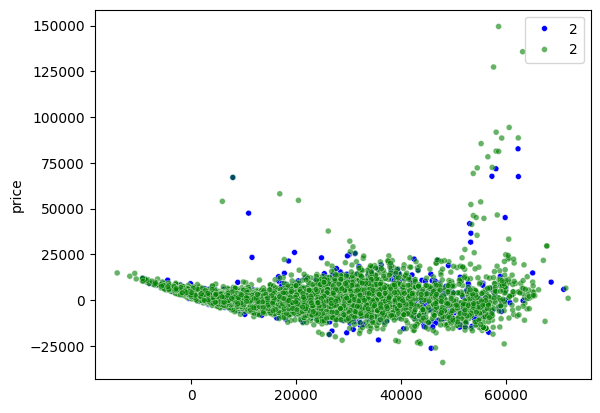

In [308]:
sns.scatterplot(x = y_pred ,y = residual_test , color = 'b', size= 2)
sns.scatterplot(x = y_pred_train ,y = residual_train , color = 'g', size=2, alpha= 0.6)

In [309]:
df = df[df.price <70000]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,...,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,...,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,...,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,...,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,...,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,...,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18193,Volvo S60,4999.000,Sedan,Used,Yes,166512.000,Manual,Benzine,Dealer,2521.000,...,No,Part/Full Leather,3.000,efficient,18.000,154.000,9.100,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,...,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,...,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package


In [484]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [494]:
X_train_t= preprocessor.fit_transform(X_train)
X_test_t= preprocessor.transform(X_test)

In [495]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_t)
X_test_scaled = scaler.transform(X_test_t)

In [496]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [497]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.889,0.886
mae,2581.731,2593.259
mse,14353980.536,14437896.545
rmse,3788.665,3799.723


In [498]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2602.941
train_neg_mean_absolute_error                  -2580.922
test_neg_mean_squared_error                -14653573.742
train_neg_mean_squared_error               -14338462.883
test_neg_root_mean_squared_error               -3821.197
train_neg_root_mean_squared_error              -3786.526
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

In [499]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [311]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [500]:
ridge_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
)

ridge_p = ridge_p.set_output(transform='pandas')

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [572]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [573]:
from sklearn.linear_model import Ridge

In [574]:
ridge_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
)

ridge_p = ridge_p.set_output(transform='pandas')

In [575]:
ridge_p.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Dealer',
                                                                              'Private '
                                                                              'seller'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Cloth',
                                                                              'Part/Full '
                                                                              'Leather'],
                                                                             ['unefficient',
                                                                              'efficient'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Pl...
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [341]:
'''y_pred = ridge_p.predict(X_test)
y_train_pred = ridge_p.predict(X_train)'''

In [343]:
'''rs = train_val(ridge_p, y_train, y_train_pred, y_test, y_pred)
rs'''

'rs = train_val(ridge_p, y_train, y_train_pred, y_test, y_pred)\nrs'

In [576]:
rs = train_val(ridge_p, X_train, y_train, X_test, y_test)
rs

,train,test
R2,0.889,0.886
mae,2580.212,2590.948
mse,14359397.523,14428992.973
rmse,3789.380,3798.551


## Cross Validation

In [577]:
model = ridge_p
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10, return_train_score=True)

In [578]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.097,0.024,0.890,0.889,-2703.206,-2565.457,-15812398.075,-14219429.407,-3976.481,-3770.866,-0.196,-0.186
2,0.198,0.053,0.884,0.889,-2546.808,-2584.184,-13776040.942,-14440268.767,-3711.609,-3800.035,-0.179,-0.188
3,0.164,0.035,0.893,0.888,-2478.671,-2595.753,-13402477.662,-14477892.405,-3660.939,-3804.983,-0.178,-0.188
4,0.317,0.019,0.890,0.889,-2546.914,-2585.306,-13962673.862,-14425002.549,-3736.666,-3798.026,-0.178,-0.187
5,0.279,0.027,0.888,0.889,-2562.646,-2583.689,-14414408.359,-14367448.421,-3796.631,-3790.442,-0.196,-0.186
6,0.185,0.036,0.896,0.888,-2634.271,-2574.907,-13459801.330,-14474032.942,-3668.760,-3804.475,-0.198,-0.185
7,0.163,0.030,0.854,0.893,-2744.501,-2560.141,-19639001.641,-13806045.396,-4431.591,-3715.649,-0.199,-0.186
8,0.209,0.023,0.893,0.888,-2519.816,-2589.671,-13309983.262,-14488878.655,-3648.285,-3806.426,-0.191,-0.186
9,0.279,0.061,0.889,0.889,-2672.182,-2573.322,-14887139.997,-14319761.783,-3858.386,-3784.146,-0.191,-0.186
10,0.149,0.044,0.890,0.889,-2600.225,-2581.077,-13851069.316,-14431255.599,-3721.702,-3798.849,-0.172,-0.188


In [579]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2600.924
train_neg_mean_absolute_error                  -2579.351
test_neg_mean_squared_error                -14651499.445
train_neg_mean_squared_error               -14345001.593
test_neg_root_mean_squared_error               -3821.105
train_neg_root_mean_squared_error              -3787.390
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

## Finding best alpha for Ridge

In [352]:
from sklearn.model_selection import GridSearchCV

In [580]:
alpha_space = np.linspace(0.1, 10, 20)
alpha_space

array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])

In [581]:
param_grid = {"Ridge__alpha":alpha_space}

In [582]:
ridge_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
)

ridge_p = ridge_p.set_output(transform='pandas')

In [583]:
ridge_grid_m = GridSearchCV(estimator = ridge_p, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [584]:
ridge_grid_m.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ...................................Ridge__alpha=0.1; total time=   0.1s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.2s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.2s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.3s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.4s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.3s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.3s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.3s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.3s
[CV] END ...................................Ridge__alpha=0.1; total time=   0.2s
[CV] END ....................Ridge__alpha=0.6210526315789474; total time=   0.3s
[CV] END ....................Ridge__alpha=0.62

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Dealer',
                                                                                                     'Private '
                                                                                                     'seller'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Cloth',
                                                                                                     'Part/Full '
                                                                                                     'Leather'],
                                                                                                    ['unefficient',
                                                                                                     'efficient'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Pr...
                                       ('scaler', MinMaxScaler()),
                                       ('Ridge', Ridge())]),
             param_grid={'Ridge__alpha': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [585]:
pd.DataFrame(ridge_grid_m.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3820.925
mean_train_score   -3786.894
Name: 1, dtype: object

In [586]:
ridge_grid_m.best_score_

-3820.9248534081025

In [587]:
train_val(ridge_grid_m, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2580.625,2591.700
mse,14356271.338,14430979.100
rmse,3788.967,3798.813


In [588]:
y_pred = ridge_grid_m.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [589]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [518]:
from sklearn.linear_model import Lasso

In [590]:
lasso_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
)

lasso_p = lasso_p.set_output(transform='pandas')

In [591]:
lasso_p.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Dealer',
                                                                              'Private '
                                                                              'seller'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Cloth',
                                                                              'Part/Full '
                                                                              'Leather'],
                                                                             ['unefficient',
                                                                              'efficient'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Pl...
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [592]:
rs = train_val(lasso_p, X_train, y_train, X_test, y_test)
rs

,train,test
R2,0.889,0.885
mae,2583.501,2595.094
mse,14378703.137,14463699.233
rmse,3791.926,3803.117


## Cross Validation

In [593]:
model = lasso_p
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10, return_train_score=True)

In [594]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.119,0.028,0.891,0.888,-2706.152,-2568.536,-15790355.033,-14240260.976,-3973.708,-3773.627,-0.196,-0.186
2,0.315,0.016,0.884,0.889,-2548.521,-2587.453,-13757784.252,-14458614.057,-3709.149,-3802.448,-0.179,-0.188
3,0.371,0.043,0.892,0.888,-2482.031,-2598.981,-13454506.856,-14497500.734,-3668.039,-3807.558,-0.178,-0.188
4,0.366,0.036,0.890,0.889,-2545.890,-2588.931,-13968611.952,-14442654.842,-3737.461,-3800.349,-0.178,-0.187
5,0.323,0.038,0.888,0.889,-2566.471,-2586.579,-14411442.550,-14384971.616,-3796.241,-3792.753,-0.197,-0.186
6,0.310,0.038,0.896,0.888,-2636.488,-2577.674,-13465160.896,-14492042.121,-3669.491,-3806.841,-0.199,-0.186
7,0.315,0.048,0.854,0.893,-2748.472,-2563.886,-19572985.170,-13825419.027,-4424.137,-3718.255,-0.200,-0.186
8,0.319,0.032,0.893,0.888,-2524.476,-2592.651,-13318628.409,-14505761.094,-3649.470,-3808.643,-0.191,-0.186
9,0.338,0.018,0.889,0.889,-2672.524,-2576.860,-14909569.001,-14339700.626,-3861.291,-3786.780,-0.191,-0.186
10,0.306,0.010,0.889,0.889,-2603.206,-2584.079,-13889932.094,-14450229.360,-3726.920,-3801.346,-0.172,-0.189


In [595]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2603.423
train_neg_mean_absolute_error                  -2582.563
test_neg_mean_squared_error                -14653897.621
train_neg_mean_squared_error               -14363715.445
test_neg_root_mean_squared_error               -3821.590
train_neg_root_mean_squared_error              -3789.860
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

## Finding best alpha for Lasso

In [596]:
alpha_space = np.linspace(0.1, 10, 20)
alpha_space

array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])

In [597]:
param_grid = {"Lasso__alpha":alpha_space}

In [598]:
lasso_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
)

lasso_p = lasso_p.set_output(transform='pandas')

In [599]:
lasso_grid_m = GridSearchCV(estimator = lasso_p, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [600]:
lasso_grid_m.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ...................................Lasso__alpha=0.1; total time=   0.2s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.5s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.6s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.5s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.5s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.4s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.6s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.7s
[CV] END ...................................Lasso__alpha=0.1; total time=   0.5s
[CV] END ...................................Lasso__alpha=0.1; total time=   1.0s
[CV] END ....................Lasso__alpha=0.6210526315789474; total time=   0.6s
[CV] END ....................Lasso__alpha=0.62

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Dealer',
                                                                                                     'Private '
                                                                                                     'seller'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Cloth',
                                                                                                     'Part/Full '
                                                                                                     'Leather'],
                                                                                                    ['unefficient',
                                                                                                     'efficient'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Pr...
                                       ('scaler', MinMaxScaler()),
                                       ('Lasso', Lasso())]),
             param_grid={'Lasso__alpha': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [601]:
pd.DataFrame(lasso_grid_m.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3820.375
mean_train_score   -3787.922
Name: 1, dtype: object

In [602]:
lasso_grid_m.best_score_

-3820.37497731048

In [603]:
train_val(lasso_grid_m, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2582.103,2593.891
mse,14364372.196,14459609.136
rmse,3790.036,3802.579


In [604]:
y_pred = lasso_grid_m.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [534]:
from sklearn.linear_model import ElasticNet

In [535]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [536]:
eln_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]
)

eln_p = eln_p.set_output(transform='pandas')

In [537]:
eln_p.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Dealer',
                                                                              'Private '
                                                                              'seller'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Cloth',
                                                                              'Part/Full '
                                                                              'Leather'],
                                                                             ['unefficient',
                                                                              'efficient'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Pl...
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [538]:
rs = train_val(eln_p, X_train, y_train, X_test, y_test)
rs

,train,test
R2,0.435,0.440
mae,6180.126,6193.425
mse,73015522.722,70790050.651
rmse,8544.912,8413.682


## Cross Validation

In [539]:
model = eln_p
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10, return_train_score=True)

In [540]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.041,0.017,0.431,0.432,-6362.533,-6167.016,-82096196.601,-72453011.315,-9060.695,-8511.933,-0.556,-0.538
2,0.260,0.036,0.444,0.436,-6008.106,-6195.235,-66067271.739,-73527132.697,-8128.178,-8574.796,-0.537,-0.542
3,0.392,0.014,0.430,0.440,-6017.086,-6169.092,-71319059.476,-72647488.120,-8445.061,-8523.350,-0.494,-0.544
4,0.223,0.010,0.433,0.436,-6167.781,-6179.146,-72037111.278,-73032908.631,-8487.468,-8545.929,-0.540,-0.542
5,0.273,0.029,0.428,0.436,-6198.005,-6172.721,-73805738.497,-72926637.105,-8591.027,-8539.709,-0.545,-0.540
6,0.272,0.039,0.437,0.435,-6240.527,-6174.177,-73147376.391,-72969082.449,-8552.624,-8542.194,-0.561,-0.540
7,0.272,0.018,0.436,0.435,-6290.123,-6171.815,-75631424.332,-72812650.200,-8696.633,-8533.033,-0.569,-0.539
8,0.274,0.029,0.430,0.437,-6095.235,-6190.388,-71087754.085,-73114008.443,-8431.355,-8550.673,-0.548,-0.542
9,0.272,0.040,0.450,0.440,-6365.473,-6126.481,-73976167.957,-72051907.606,-8600.940,-8488.340,-0.564,-0.537
10,0.267,0.020,0.441,0.439,-6009.113,-6172.449,-70117858.610,-72797523.552,-8373.641,-8532.146,-0.495,-0.544


In [541]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.436
train_r2                                           0.437
test_neg_mean_absolute_error                   -6175.398
train_neg_mean_absolute_error                  -6171.852
test_neg_mean_squared_error                -72928595.897
train_neg_mean_squared_error               -72833235.012
test_neg_root_mean_squared_error               -8536.762
train_neg_root_mean_squared_error              -8534.210
test_neg_mean_absolute_percentage_error           -0.541
train_neg_mean_absolute_percentage_error          -0.541
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [542]:
param_grid = {"ElasticNet__alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "ElasticNet__l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [543]:
eln_p = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]
)

eln_p = eln_p.set_output(transform='pandas')

In [544]:
eln_grid_m = GridSearchCV(estimator = eln_p, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [545]:
eln_grid_m.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.1s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.4s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.4s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.4s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   1.1s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.3s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.4s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.3s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.3s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.1; total time=   0.3s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet__l1_ratio=0.5; total time=   0.4s
[CV] END ...ElasticNet__alpha=0.01, ElasticNet

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Dealer',
                                                                                                     'Private '
                                                                                                     'seller'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['Cloth',
                                                                                                     'Part/Full '
                                                                                                     'Leather'],
                                                                                                    ['unefficient',
                                                                                                     'efficient'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Pr...
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             param_grid={'ElasticNet__alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7,
                                               1],
                         'ElasticNet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                  0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [546]:
pd.DataFrame(eln_grid_m.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4146.804
mean_train_score   -4121.938
Name: 1, dtype: object

In [547]:
eln_grid_m.best_score_

-3820.235822029773

In [548]:
train_val(eln_grid_m, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2581.905,2593.625
mse,14360830.929,14453676.991
rmse,3789.569,3801.799


In [549]:
y_pred = eln_grid_m.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [432]:
lasso_grid_m.best_estimator_["Lasso"]

Lasso(alpha=0.6210526315789474)

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_m.best_estimator_["Lasso"]

viz = FeatureImportances(model, 
                         labels=lasso_grid_m.best_estimator_["preprocessor"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [551]:
df_n= df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

In [552]:
df_n

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used,7450.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
...,...,...,...,...,...,...,...
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18193,Volvo S60,154.000,166512.000,18.000,2521.000,Used,4999.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used,7300.000


In [553]:
X = df_n.drop(columns = ["price"])
y = df_n.price

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [555]:
onehot_col = ['make_model']
ordinal_col = ['type']

In [556]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[["Used", "Employee's car", "Demonstration", "Pre-registered"]])
onehot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)


In [557]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_col),
        ('onehot', onehot_encoder, onehot_col)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

preprocessor = preprocessor.set_output(transform="pandas")

In [558]:
lasso_l_m = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=0.6210526315789474))]
)

lasso_l_m = lasso_l_m.set_output(transform='pandas')

In [559]:
lasso_l_m.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['type']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.6210526315789474))])

In [560]:
train_val(lasso_l_m, X_train, y_train, X_test, y_test)

,train,test
R2,0.876,0.871
mae,2762.306,2770.294
mse,16011894.189,16345070.088
rmse,4001.486,4042.904


## Cross Validate

In [561]:
model = lasso_l_m
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10, return_train_score=True)

In [562]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.076,0.013,0.876,0.876,-2901.406,-2746.247,-17878140.615,-15828529.637,-4228.255,-3978.508,-0.210,-0.198
2,0.503,0.010,0.866,0.877,-2791.369,-2758.559,-15899566.459,-16036207.180,-3987.426,-4004.523,-0.198,-0.200
3,0.353,0.030,0.880,0.876,-2698.370,-2772.803,-15011292.057,-16130867.720,-3874.441,-4016.325,-0.192,-0.201
4,0.369,0.025,0.880,0.876,-2686.717,-2773.158,-15215634.416,-16118984.420,-3900.722,-4014.846,-0.187,-0.200
5,0.438,0.013,0.878,0.876,-2731.080,-2766.166,-15678268.949,-16061166.903,-3959.579,-4007.639,-0.212,-0.199
6,0.323,0.025,0.890,0.875,-2749.914,-2762.125,-14322009.982,-16204368.530,-3784.443,-4025.465,-0.209,-0.199
7,0.327,0.021,0.839,0.880,-2923.146,-2744.943,-21620099.666,-15412901.206,-4649.742,-3925.927,-0.210,-0.200
8,0.315,0.062,0.885,0.875,-2674.926,-2775.663,-14277721.116,-16212039.886,-3778.587,-4026.418,-0.201,-0.200
9,0.354,0.026,0.873,0.876,-2877.588,-2749.658,-17096333.139,-15909370.590,-4134.771,-3988.655,-0.204,-0.199
10,0.327,0.020,0.877,0.876,-2769.456,-2766.360,-15445113.461,-16091698.522,-3930.027,-4011.446,-0.184,-0.202


In [563]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.874
train_r2                                           0.876
test_neg_mean_absolute_error                   -2780.397
train_neg_mean_absolute_error                  -2761.568
test_neg_mean_squared_error                -16244417.986
train_neg_mean_squared_error               -16000613.459
test_neg_root_mean_squared_error               -4022.799
train_neg_root_mean_squared_error              -3999.975
test_neg_mean_absolute_percentage_error           -0.201
train_neg_mean_absolute_percentage_error          -0.200
dtype: float64

In [564]:
y_pred = lasso_l_m.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 7. Visually Compare Models Performance In a Graph

In [605]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

,Model,r2_score,mae,rmse,mape
0,linear_m,0.886,2593.259,3799.723,0.197
1,ridge_m,0.886,2591.700,3798.813,0.197
2,lasso_m,0.886,2593.891,3802.579,0.197
3,elastic_m,0.886,2593.625,3801.799,0.197
4,final_m,0.871,2770.294,4042.904,0.208


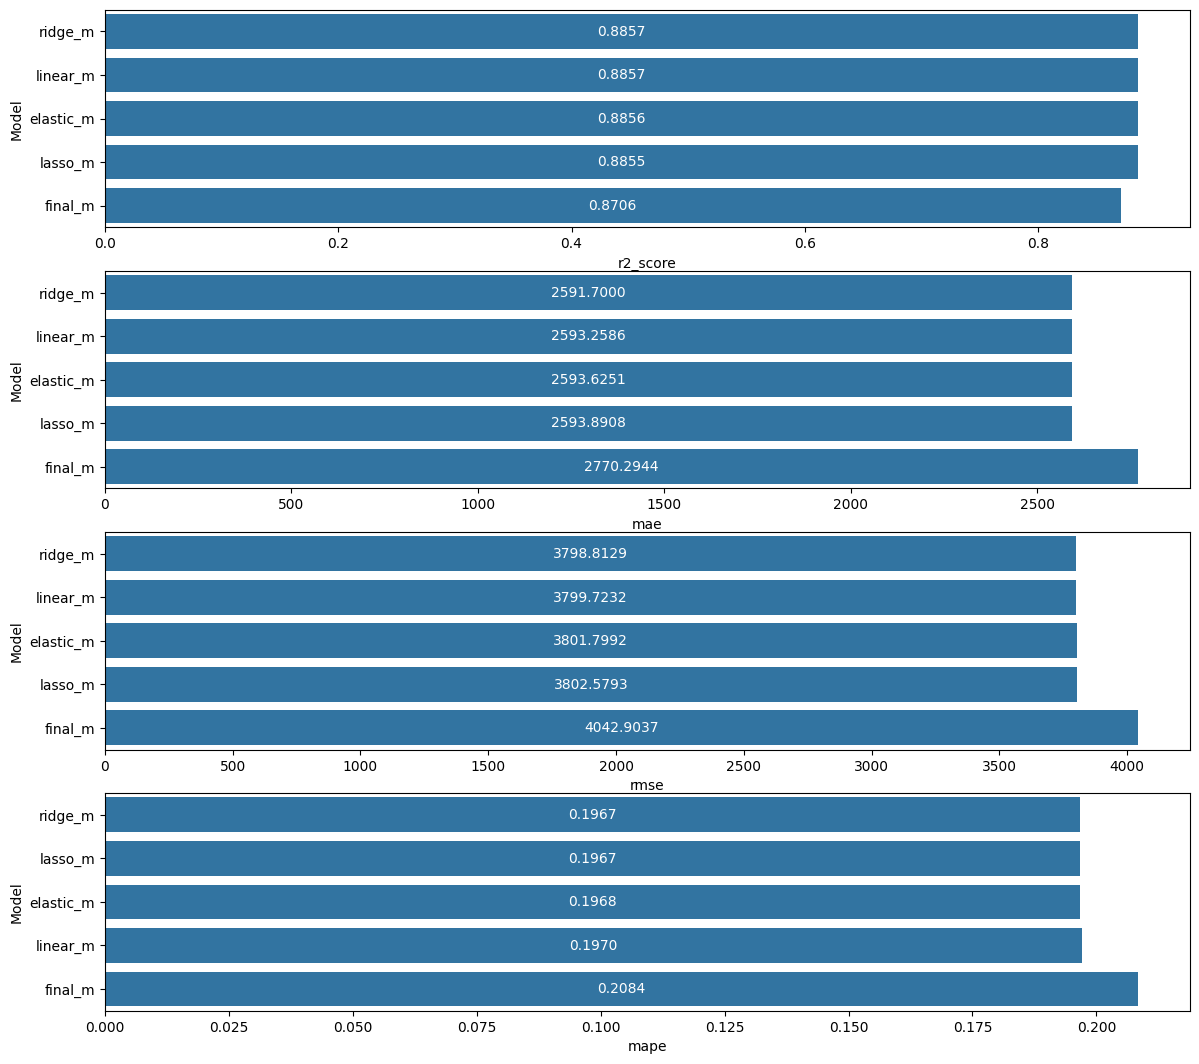

In [606]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [473]:
df_n

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used,7450.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
...,...,...,...,...,...,...,...
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18193,Volvo S60,154.000,166512.000,18.000,2521.000,Used,4999.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used,7300.000


In [479]:
new_sample = {
    'make_model' : 'Mercedes-Benz A 180	',
    'power_kW'  : '85.000',
    'mileage'   : '25000',
    'age'       : '4',
    'engine_size' : '1400',
    'type'      : 'Used'
}

In [480]:
new_sample = pd.DataFrame([new_sample])

In [481]:
lasso_l_m.predict(new_sample)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([17839.30032658])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___